# Tutorial 4:  Dengue Fever Regression




**Week 2, Day 5: Climate Response: adaptation and impact**

**By Climatematch Academy**

__Content creators:__ Deepak Mewada, Grace Lindsay

__Content reviewers:__ Ohad Zivan, Name Surname

__Content editors:__ Name Surname, Name Surname

__Production editors:__ Name Surname, Name Surname

___
# Tutorial Objectives

*Estimated timing of tutorial: X minutes* [todo]

Welcome to tutorial 4 of a series focused on understanding the role of data science and machine learning in addressing the impact of climate change and adapting to it.

In this tutorial we will apply linear regression to the Dengue data set. Specifically, by the end of this tutorial, you will be able to:

- Clean the data
- Implement linear regression using scikit learn on Dengue Fever Dataset and evaluate its performance
- Use 'dummy variables' to handle categorical data
- Use scikit-learn's Poisson GLM method to handle integer-valued data 

---

In [ ]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/kaq2x/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)



---
# Setup

In [ ]:
#@title Import necessary libraries:
import numpy as np  # Import the numpy library as np
from sklearn.linear_model import LinearRegression # Import the LinearRegression class from the sklearn.linear_model module
import matplotlib.pyplot as plt # Import the pyplot module from the matplotlib library
import pandas as pd # Import the pandas library and the drive function from the google.colab module
from google.colab import drive  # Importing the drive module from the google.colab library
from sklearn.metrics import mean_absolute_error, mean_squared_error 

<details>
<summary> <font color='Red'>Click here if you are running on local machine or you encounter any error while importing   </font></summary>
**NOTE:** Please note that if you are running this code on a local machine and encounter an error while importing a library, make sure to install the library via pip. For example, if you receive a `"ModuleNotFoundError: No module named 'google.colab'" `error while using 'Colab', please run `"pip install google"` to install the required module.

---

# Section 1: Dengue Fever Regression



In [ ]:
# @title Video 1: Video 1 Name
from ipywidgets import widgets
from IPython.display import display, IFrame, YouTubeVideo

out2 = widgets.Output()
with out2:
  class BiliVideo(IFrame):
    def __init__(self, id, page=1, width=400, height=300, **kwargs):
      self.id=id
      src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
      super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="", width=854, height=480, fs=1)
  print(f'Video available at https://www.bilibili.com/video/{video.id}')
  display(video)

out1 = widgets.Output()
with out1:
  video = YouTubeVideo(id="", width=854, height=480, fs=1, rel=0)
  print(f'Video available at https://youtube.com/watch?v={video.id}')
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)



---


## Section 1.1:  Loading the Dataset

---



In [ ]:

#@markdown This cell downloads the Dengue Fever dataset that we will use in this tutorial.
#@markdown In this code, we are loading two CSV files from the mounted Google Drive into separate Pandas dataframes. The first dataframe df_features will hold the features data for our model, while the second dataframe df_labels will hold the corresponding labels. By giving them proper names, we can easily differentiate between the two dataframes and understand their purpose.
# Mount the Google Drive to the Colab notebook
drive.mount('/content/drive')

# Load two csv files from the mounted Google Drive into separate Pandas dataframes
# `df_features` will hold the features data for our model
# `df_labels` will hold the corresponding labels
df_features = pd.read_csv('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D5 - Climate Response - Adaptation Impact /W2D5 Tutorials/dengue_features_train(1).csv')
df_labels = pd.read_csv('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D5 - Climate Response - Adaptation Impact /W2D5 Tutorials/dengue_labels_train.csv')


Mounted at /content/drive




---


## Section 1.2:  Explore the dataset

---



In [ ]:
#@markdown In this code, we are working with the df_features dataframe. The df_features.head() function call will display the first 5 rows of the dataframe, which is helpful for quickly inspecting the data and getting a sense of its structure.

# Display the first 5 rows of the df_features dataframe
df_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


Since We have already explored and visualised the dataset enough in the previous tutorial so we are now good to go with next steps.

We will start by preprocessing the data and building a model to predict cases of dengue fever.

In the case of predicting dengue fever the environmental variables are the independent variables (or regressors), while number of dengue fever cases is the dependent variable that we want to predict.

---
## Section 1.3:  Data Preprocessing

---



As we saw in our data exploration ealier in last tutorial, some data values were missing for certain weeks. Let's start by replacing any missing values with mean values. Let's also remove some columns that we won't use for our prediction now such as city, year, and week start date. 



In [ ]:
#@title Data Cleaning

# Drop columns 'city', 'year', and 'week_start_date' from the 'df' dataframe to create a new dataframe 'df_cleaned'
df_cleaned = df_features.drop(['city','year','week_start_date'],axis=1)

# Replace missing values with median
df_cleaned = df_cleaned.fillna(df_cleaned.median()) 

# Replace null values in 'df_cleaned' with the mean value of the column
#df_cleaned = df_cleaned.fillna(df_cleaned.mean())

Now we can start to build a model with this data. As in our simulated data, however, we don't want to just evaluate our model on the exact data it was trained on, as this can be misleading. We want to make sure our model works well on held out data too. So let's first divide the data into a training set and a test set.

In [ ]:
#@title  Train-Test Split

# Select the 'total_cases' column from the 'df_dengue' dataframe and assign it to the variable 'cases'
cases = df_labels['total_cases']

# Create a boolean mask with random values for each element in 'cases'
np.random.seed(145) #setting the random seed ensures we are all using the same train/test split
mask = np.random.rand(len(cases)) < 0.8   #this will use 80% of the data to train and 20% to test

# Create two new dataframes from the 'df_cleaned' dataframe based on the boolean mask
df_cleaned_train = df_cleaned[mask]
df_cleaned_test = df_cleaned[~mask]

# Create two new arrays from the 'cases' array based on the boolean mask
cases_train = cases[mask]
cases_test = cases[~mask]



---


## Section 1.2 Fitting Model and Analyzing Results 

---



### Coding Exercise 1.1: Implement regression on Dengue Fever dataset and evaluate the performance
For this exercise, use what you learned in the previous tutorials to train a linear regression model on the training data and evalute its performance. Evaluate its performance on the training data and the test data. Look specifically at the difference between predicted values and true values on the test set. 

*Exercise Objextive*:
1. Train a linear regression model on the training data
2. Evaluate the performance of the model on both training and test data.
3. Look specifically at the difference between predicted values and true values on the test set.

In [ ]:
#################################################
## TODO for students: 
# Fill in the code in empty places to remove this error
raise NotImplementedError("Student exercise: Fill in the code in empty places to remove this error")
#################################################


# Create a new instance of the LinearRegression class
reg_model = ... # add code here

# Train the model on the training data i.e on df_cleaned_train,cases_train
...  # add code here 

# Print the R^2 score of the trained model on the training data
print('r^2 on training data is: ')
print(reg_model.score(...,...))

# Print the R^2 score of the trained model on the test data
print('r^2 on test data is: ')
print(reg_model.score(...,...))

# Create a scatter plot of the predicted values vs. the actual values for the test data
plt.scatter(...,reg_model.predict(df_cleaned_test))


# Add axis labels to the scatter plot
plt.xlabel('Actual Number of Dengue Cases')
plt.ylabel('Predicted Number of Dengue Cases')

NotImplementedError: ignored

r^2 on training data is: 
0.15932380809444602
r^2 on test data is: 
0.12345655861142157


Text(0.5, 1.0, 'Predicted values vs. the actual values for the test data')

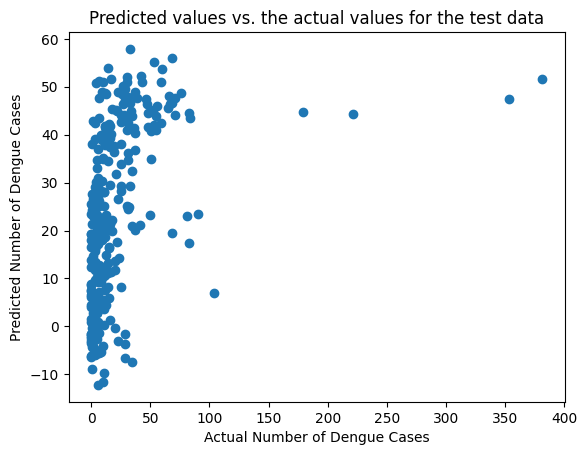

In [ ]:
# to_remove solution


# Create a new instance of the LinearRegression class
reg_model = LinearRegression()

# Train the model on the training data
reg_model.fit(df_cleaned_train,cases_train) 

# Print the R^2 score of the trained model on the training data
print('r^2 on training data is: ')
print(reg_model.score(df_cleaned_train,cases_train))

# Print the R^2 score of the trained model on the test data
print('r^2 on test data is: ')
print(reg_model.score(df_cleaned_test,cases_test))

# Create a scatter plot of the predicted values vs. the actual values for the test data
plt.scatter(cases_test,reg_model.predict(df_cleaned_test))

# Add axis labels to the scatter plot
plt.xlabel('Actual Number of Dengue Cases')
plt.ylabel('Predicted Number of Dengue Cases')
plt.title('Predicted values vs. the actual values for the test data')

In [ ]:
#@title Evaluating the performance of the model using metrics such as mean absolute error (MAE) and mean squared error (MSE)

y_pred = reg_model.predict(df_cleaned_test)
print('MAE:', mean_absolute_error(cases_test, y_pred))
print('MSE:', mean_squared_error(cases_test, y_pred))

MAE: 18.93374886077583
MSE: 1316.3553077081347


### Think! 1.2: What did you observe?

 Do you think the model performs well enough to be useful in anticipating dengue fever outbreaks? 





---


#(Bonus) Section 2 : Handling Different Scenarios
---



## Section 2.1: Handling Categorical Regressor 


We chose to remove city as a regressor because it is not a numerical value and therefore does not fit as easily into the linear regression framework. However it is possible to include such categorical data. To do so, you need to turn the string variables representing cities into 'dummy variables', that is, numerical values that stand in for the categories. Here we can simply arbitrarily set one city to the value 0 and the other the value 1. See how including city impacts regression performance

R-squared on training data is:  0.1629350603545877
R-squared on test data is:  0.12105597828261849


Text(0.5, 1.0, 'Predicted vs Actual number of dengue cases (with city as a regressor)')

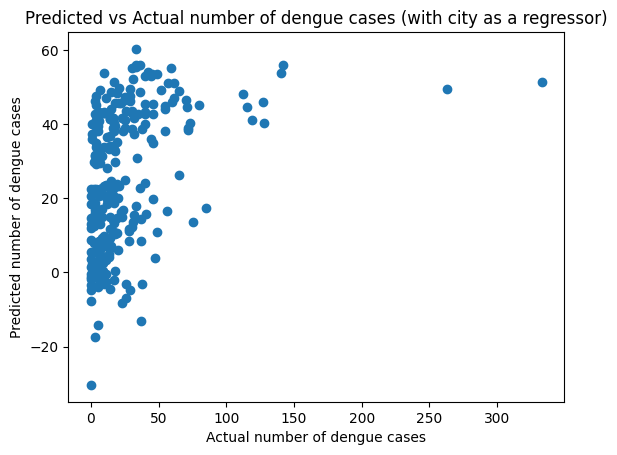

In [ ]:
# Include city as a regressor by creating dummy variables for the 'city' column
df_cleaned_city = pd.get_dummies(df_features[['city']], drop_first=True)
df_cleaned_city.reset_index(drop=True, inplace=True)

# Combine the cleaned data with the city dummy variables
df_cleaned_combined = pd.concat([df_cleaned, df_cleaned_city], axis=1)

# Split the data into training and test sets using a random mask
np.random.seed(144) 
mask = np.random.rand(len(cases)) < 0.8
df_cleaned_train = df_cleaned_combined[mask]
df_cleaned_test = df_cleaned_combined[~mask]
cases_train = cases[mask]
cases_test = cases[~mask]

# Train a linear regression model with city as a regressor
reg_model_city = LinearRegression()
reg_model_city.fit(df_cleaned_train, cases_train)

# Print R-squared scores for the train and test sets
print('R-squared on training data is: ', reg_model_city.score(df_cleaned_train, cases_train))
print('R-squared on test data is: ', reg_model_city.score(df_cleaned_test, cases_test))

# Create a scatter plot of the predicted values vs. the actual values for the test data
plt.scatter(cases_test, reg_model_city.predict(df_cleaned_test))
plt.xlabel('Actual number of dengue cases')
plt.ylabel('Predicted number of dengue cases')
plt.title('Predicted vs Actual number of dengue cases (with city as a regressor)')


In [ ]:
#@title Evaluating the performance of the model using metrics such as mean absolute error (MAE) and mean squared error (MSE)

y_pred = reg_model_city.predict(df_cleaned_test)
print('MAE:', mean_absolute_error(cases_test, y_pred))
print('MSE:', mean_squared_error(cases_test, y_pred))

MAE: 20.000926671025272
MSE: 1058.71647438151


Does including the city help the model predict cases?

##  Section 2.2 : Handling Integer Valued Dependent Variable 

In our simulated data, the dependent variable was real-valued and followed a normal distribution. Here, the weekly case numbers are integers and are better described by a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). Therefore, plain linear regression is not actually the most appropriate approach for this data. Rather, we should use a generalized linear model, or GLM, which is like linear regression, but includes an extra step that makes it more suited to handle Poisson data. Try to use [scikit-learn's Poisson GLM method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html) on this data. 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


r^2 on training data is: 
0.34279370817724775
r^2 on test data is: 
0.23997963689556745


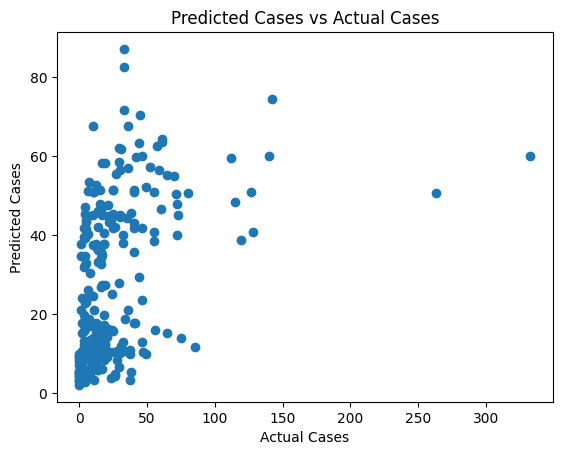

In [ ]:
# import PoissonRegressor from sklearn.linear_model
from sklearn.linear_model import PoissonRegressor

# create PoissonRegressor object
poisson_reg = PoissonRegressor()

# fit the PoissonRegressor model with training data
poisson_reg.fit(df_cleaned_train, cases_train)

# calculate r^2 score on training data
print('r^2 on training data is: ')
print(poisson_reg.score(df_cleaned_train, cases_train))

# calculate r^2 score on test data
print('r^2 on test data is: ')
print(poisson_reg.score(df_cleaned_test, cases_test))

# plot predicted values against test data
plt.scatter(cases_test, poisson_reg.predict(df_cleaned_test))

# add plot title and labels
plt.title("Predicted Cases vs Actual Cases")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.show()


In [ ]:
#@title Evaluating the performance of the model using metrics such as mean absolute error (MAE) and mean squared error (MSE)

y_pred = poisson_reg.predict(df_cleaned_test)
print('MAE:', mean_absolute_error(cases_test, y_pred))
print('MSE:', mean_squared_error(cases_test, y_pred))

MAE: 18.715297774757882
MSE: 1011.3038581219073


### Think! 2.2: Performance of model

Engage in discussion with your pod to share your observations from the additional changes above.
- What did you observe?
- Reflect on how different factors may affect the performance of the model.
- Brainstorm as a group additional ways to improve the model's performance.




---


# Summary

Estimated timing of tutorial: 

In this tutorial, we applied linear regression to the Dengue Fever Dataset to demonstrate how to clean and preprocess data, implement linear regression using scikit-learn, and evaluate model performance. Additionally, we used dummy variables to handle categorical data and scikit-learn's Poisson GLM method for integer-valued data. By the end of the tutorial, learners had gained practical experience in applying linear regression techniques to real-world datasets.

---

